** Imports. **

In [0]:
import numpy as np
from operator import attrgetter
from scipy import stats
import random
import string

import matplotlib.pyplot as plt

** SIMULATOR SPECIFICATIONS. **

Based on Group Work.

 Implement three Python classes — Building, Elevator, Passenger **DONE**
 
 The building has 1 elevator and a user­defined number of floors and passengers. **DONE**
 
 The elevator has a user­defined capacity — that is the maximum number of passengers
that can be in the elevator simultaneously **DONE**

Each passenger starts on a random floor in the building and wants to go to a different
random floor. **DONE** * (Implemented as random choices within the strategies, excluding the current floor.)*

Each passenger uses the elevator only once, and the simulation ends once all passengers
have reached their destination floors.* **DONE**  *(Termination of pickup  when limits are met)* The simulations dont stop till occupation is empty. Also it keeps track of users. Once a passenger is out, they are detatched from the system.  The entries from the building floor ccould be new or old passengers but when they come in, they are regarded as new passengers hence new instances.

In your main code block, create the building and run the simulation by repeatedly updating
the state of the passengers, elevator, and building in a loop. Check whether all passengers
have arrived at their destinations to determine when to stop the loop. **DONE** *(Implemented as loops that drive the efficiency evaluations. Passenger states are used to keep track of whether they arive or not.)*

Display the state of your simulation at regular intervals so you can monitor whether
everything is working as you expect. Are the right number of passengers getting on and off
the elevator? Does your simulation end or does it get stuck in an infinite loop for some
reason? How many passengers have arrived at their destination? Use the answers to these
questions to monitor the correctness of your simulation.**DONE**
*(For faster simulation and to avoid clutter, flags were included for the strategies. )*






In [0]:
# Create a building with a specified number of floors
class Building():
    def __init__(self, num_floors):
        self.num_floors = num_floors
        

# Create a passenger with a unique location and destination, at_destination is a dummy variable
class Passenger():
    def __init__(self, location, destination, at_destination):
        self.location = location
        self.destination = destination
        self.at_destination = at_destination
        
        
# Create an elevator with locations and a specified capacity, occupants is a list of passengers on the elevator
class Elevator():
    
    def __init__(self, location, capacity):
        self.location = location
        self.capacity = capacity
        self.occupants = []
        
    # Move the elevator up one floor
    def move_up(self):
        self.location += 1
        
    # Move the elevator down one floor
    def move_down(self):
        self.location -= 1
        
    # Move the elevator to a given floor
    def to_floor(self, go_to):
        self.location = go_to
        
    # Unload the elevator
    def unload(self):
        # for each person in the elevator whose destination is the same as the
        # elevator's location, remove them from the elevator and mark their location as "arrived"
        for person in self.occupants:
            if person.destination == self.location:
                person.location =  'arrived'
                self.occupants.remove(person)
    
    # Load the elevator
    def load(self, people):
        # At a certain floor, if there is still space in the elevator,
        # load as many people who are waiting on that floor as possible to the elevator
        if len(self.occupants) < self.capacity:
            queued = [person for person in people if person.location==self.location]
            for person in queued[:(self.capacity-len(self.occupants))]:
                person.location = 'on elevator'
                self.occupants.append(person)
            return
        # If the elevator is full, don't do anything
        elif len(self.occupants) == self.capacity:
            return
        else:
            print('overfull')

**GROUP WORK**

**Strategy 1**

Strategy 1 (from assignment description):
The elevator starts from the ground floor and moves all the way to the top floor, stopping at every floor in between. When the elevator reaches the top floor, it changes direction and moves all the way back down to the ground floor, again stopping at every floor in between. At every floor where the elevator stops any passengers who want to get off leave and any passengers who want to get on enter, as long as there is space in the elevator. If the elevator is full, passengers on that floor have to wait. Upon reaching the ground floor, the elevator repeats the cycle of moving all the way up and all the way down the building.

In [52]:
#Implemented by Braden
def strategy_1(start_floor, elev_cap, num_floors, num_people, print_status=False):
    # Create an Elevator object and a Building object
    elevator = Elevator(location=start_floor, capacity=elev_cap)
    building = Building(num_floors)
    
    # Create a list of all the people in the building
    people = []
    
    # The number of stops that the elevator makes indicates efficiency
    num_of_stops=0
    
    # Create people objects with random initial floors and destinations
    for i in range(num_people):
        # Generate a random integer between 1 and the number of floors to get
        # an initial floor for each person
        init_floor = np.random.randint(1, num_floors+1)
        # Generate a random integer between 1 and the number of floors that
        # is different from the initial floor generated above to get
        # a destination floor for each person
        f = [x for x in range(1, num_floors+1) if x != init_floor]
        destination = np.random.choice(f)
        
        # Create a Passenger object and append it to the list of people
        person = Passenger(location=init_floor, destination=destination, at_destination=0)
        people.append(person)
            
    # A variable to keep track of how many people have arrived
    arrived = 0
    
    
    # A while loop that runs until everybody has arrived at their destination
    while arrived < len(people):
        
        # The elevator runs from bottom to top, stop at each floors, unload/load
        for i in range(num_floors - 1):
            if print_status and arrived%4==1:
              print('Current Locations: ', list(map(attrgetter('location'), people)))
          
            elevator.unload()
            elevator.load(people)
            elevator.move_up()
            arrived = np.sum([person.location=='arrived' for person in people])
            # if everyone has arrived, the loop terminates
            if arrived == len(people):
                break
            # for each floor that the elevator stops at, add one to the counter
            num_of_stops+=1  
            
        # Check if everyone has arrived    
        if arrived == len(people):
            break
        
        
        # The elevator runs from top to bottom, stop at each floors, unload/load
        for i in range(num_floors - 1):
            if print_status and arrived%4==1:
              print('Current Locations: ', list(map(attrgetter('location'), people)))
            
            elevator.unload()
            elevator.load(people)
            elevator.move_down()
            arrived = np.sum([person.location=='arrived' for person in people])
            # if everyone has arrived, the loop terminates
            if arrived == len(people):
                break
            num_of_stops+=1  
            
    
    # Return the number of stops. In this case, it equals the number of floors that
    # the elevator has travelled
    return num_of_stops
  
strat_1 = strategy_1(start_floor=1, elev_cap=15, num_floors=12, num_people=100, print_status=True)
  
  # The average number of stops after running 100 simulations with
# specified parameters for the first strategy
stops_1 = []
for i in range(100):
    stops_1.append(strategy_1(start_floor=1, elev_cap=15, num_floors=12, num_people=400))
print('The average number of stops: %f' %np.mean(stops_1))

Current Locations:  [6, 11, 6, 10, 11, 8, 4, 10, 'on elevator', 4, 'on elevator', 7, 3, 4, 4, 10, 4, 4, 3, 4, 10, 6, 5, 'on elevator', 4, 3, 12, 8, 3, 'on elevator', 11, 8, 5, 7, 11, 9, 6, 8, 6, 3, 'on elevator', 'on elevator', 12, 9, 12, 10, 10, 7, 6, 12, 12, 8, 11, 3, 5, 'arrived', 6, 12, 'on elevator', 6, 9, 8, 9, 8, 8, 10, 6, 12, 8, 'on elevator', 3, 9, 5, 5, 10, 12, 5, 6, 8, 12, 9, 3, 7, 5, 10, 4, 3, 10, 6, 6, 5, 3, 'on elevator', 6, 3, 9, 8, 'on elevator', 9, 6]
Current Locations:  ['on elevator', 11, 6, 10, 11, 8, 'on elevator', 10, 'on elevator', 4, 'on elevator', 7, 'on elevator', 4, 4, 10, 4, 4, 'on elevator', 4, 10, 6, 'on elevator', 'on elevator', 4, 'on elevator', 12, 8, 'on elevator', 'arrived', 11, 8, 5, 7, 11, 9, 6, 8, 6, 'on elevator', 'on elevator', 'arrived', 12, 9, 12, 10, 10, 7, 6, 12, 12, 8, 11, 'on elevator', 5, 'arrived', 6, 12, 'on elevator', 6, 9, 8, 9, 8, 8, 10, 6, 12, 8, 'arrived', 3, 9, 5, 5, 10, 12, 5, 6, 8, 12, 9, 3, 7, 5, 10, 4, 3, 10, 6, 6, 5, 3, 'on el

**Personal Report**

This was a relatively straight forward and simple strategy. The elevator simply made Its way up and down till all passengers reached their destination.
The efficiency metric we worked with was the number of stops the elevator made to ferry all passengers. This strategy was less efficient, and to deliver 400  people, it made an average of 299 stops.

I will do a comparison of this based on the stated metric in the final plot.



**Strategy 2**

The elevator begins on the ground floor and accepts all passengers waiting there or as many as it can carry. If there are no passengers on the ground floor, it moves to the first floor and does the same thing, etc. After encountering a floor with passengers, the elevator drops off the passengers in the order that they enter the elevator. At each floor the elevator drops passengers off, it accepts as many new passengers as it can hold and they are placed at the end of the dropoff queue. If the elevator is ever empty (drops off all passengers and no more have gotten on), it move up/down to the next floor with waiting passengers.

An optimmization has been implemented to ensure that regardless of entry order, a passenger once at their destination can leave the elevator. It prioritizes the entry order to minimize the wait time.

**Personal Report**

Note: To keep things simple,  I did not implement some functionalities due to the m being very rare cases and knowing how overkill I can get, I cleaned up for them. Such cases include:

When the elevator fails to collect a passenger after delivering the first bunch. Ideally it would go up till it finds a passenger, then when it gets us it goes down again. The capability to implemeent this has been illustrated in strategy 1 but this almost never happens. Due to the random nature of our passenger initiator and spawner, we are almost sure we will get a passenger in the upward motion when starting given out test capacity.  It thus sufficed to do this. 
In the cases where the elevator terminates after picking the first passengers, and they are all delivered before more are picked, this we clean up later. 

This happened about once in 150 times so I so no need to include it given we needed to only simulate 400times. I cleaned up for this to make the calculation consistent and avoid adding complexities to our code.

A third case, the system picks up passengers till it detect it has picked equal or more than num_people. The reason it is equal and more than is because we randomly pick passengers and the last pickup can slightly overshoot our initial set num_people. I can easily terminate the floor counter but the priority was to deliver all passengers. I however, stopped counting the travelled floors once we delivered 400 passengers to keep the calculations consistent.

The code is thoroughly commented so all sections and what they do should be clear.

In [53]:
# Brian Strategy 2

# Create a new class for the 2nd strategy that inherits Building and Elavator classes
class Strategy2(Building, Elevator):
  def __init__(self, location = 0 , capacity=15, num_floors = 12, num_people = 400, log = True, optimal = False): #Predefined the arguments since we standardized them. 
    Building.__init__(self, num_floors = num_floors) #Inherited the Building Class and initialized it
    Elevator.__init__(self, location = location, capacity=capacity) #Inherited the elvator class and initiated it
    self.num_people = num_people #Initiated a class variable, num people
    self.log = log
    self.optimal = optimal
    
  """
  Is the engine behind spawning. Spawn is used to initiate the passengers but initiate is the one that creates them
  At any floor where delivery is happening, initiate is called to generate a passenger list. 
  It generates a passenger list with a max number of the empty capacity
  """
  def initiate(self,start_pass, occupancy, start, floor):#Define initiate method that generates passengers
    if start:#If start meaning when turning on the elvator, it is empty so maximum entry is full capacity. Randomized either way
      num_passengers = random.randint(0, self.capacity)
    else:#Otherwise, the elevator has been at work
      num_passengers = random.randint(0, occupancy)# Maximum entry capacity is equal to the occupancy,
    passengers = {}#Initiate the passenger list token
    #Assign destinations
    for pas in range(0, num_passengers):#Create as many passengers as the num_passengers randomly generated
      passengers[start_pass + pas] = {"Passenger_id":''.join([random.choice(string.ascii_letters + string.digits) for n in range(8)]),#Unique passenger id created
                         "Passenger": Passenger(location = floor, destination = random.choice([i for i in range(0,floor)]+[i for i in range(floor+1,self.num_floors)]),
                                                at_destination = False)#Each passenger is instance of the passenger class. Random destinations selected
                        }
    return passengers
  
  
  """
  This is used to initiate the system. It starts at floor 0, if there are no passengers, it goes to the next floor
  and calls initiate again. It does so until it finds a passenger, after which it breaks and returns the passenger list
  """
  def spawn_passengers(self):
    for flo in range(self.num_floors):
      pass_bunch = self.initiate(start = True, start_pass = 0, occupancy = self.capacity,  floor = self.location)#At the start, the starting passengers are 0, we spawn with full capacity and spawn as false
      if self.log:
        print(f"Picked up {len(pass_bunch)} passengers on floor {flo}, empty space = {self.capacity - len(pass_bunch)}")
      #if the first floor is empty, it moves to the second and does the same:
      if len(pass_bunch) == 0:#We move up floors if the starting bunch is 0. we move up. 
        #I was going to implement the logic such that we keep going up and when up we start going down if no passenger is found but the probability of that happening is so low at out capacity
        #The code section would be almost vestigial at that point. There will always be someone to be picked up in the up movement and they would initiate the motion.
        self.move_up()
      else:
        break
    if self.log:
      print("\n")

    return pass_bunch
  
  
  """
  This is the delivery engine. It run on condition that we have passengers in the elevator.
  It delivers them in the order they enter. At any delivery point, it checks for new passengers to current empty capacity max.
  If new passengers are present, it adds them by combining them with the current set, but gives them an entry order.
  It does so until the elevator is empty
  """
  def deliver_passengers(self):
    passengers = self.spawn_passengers() #At the start we spawn passengers
    order = list(passengers.keys())#I forced a list of the entry order to allow the dict to be mutable
    served = []#You can used the served list to check the status of each passenger served
    stop_count = 0 #Counter of stops
    floor_count = 0#Counter of floors
    picked_up = len(passengers) #Counter for number of picked up passengers
    while len(passengers) >0:#Keep all passengers leave train
      cur_pas = passengers[order[0]]#The current passenger in service will always be the first one to enter on the ordered list
      floor_count += abs(cur_pas['Passenger'].destination-cur_pas['Passenger'].location) #Count number of floors travelled: Is abs end(destination)- start(location)  for current passenger.
      if self.log:
        print(f"################################## Door open on on floor: {cur_pas['Passenger'].destination} ##################################")
      """
        To optimize the strategy, we will unload any passenger whose destinaation is reached regardless of entry order. It also cleans up the rare case(Due to randomization) where a passenger's enty and destination are the same. 
      """
      if self.optimal:
        for  oe in order:#None the less, we will still check if any passenger has reached their = destination floor
          if passengers[oe]["Passenger"].destination == cur_pas['Passenger'].destination:
            passen = passengers[oe] #Make this a variable to allow for dict mutation
            passen["Passenger"].at_destination =  1 #Update the passenger list
            served.append(passen) #Save the served passengers in the list for verification if needed
            #Delete from record delivered passengers
            del passengers[oe]#Delete them from the token of current passengers if they are delivered
            if self.log:
              print(f"Delivered passenger {passen['Passenger_id']}, entry order {oe} on floor {passen['Passenger'].location}"\
                    +f" to floor {passen['Passenger'].destination}. Empty space: {self.capacity -len(passengers)}")#Log statement showing they were delivered

      else:
        oe = order[0]
        passen = passengers[oe] #Make this a variable to allow for dict mutation
        passen["Passenger"].at_destination =  1 #Update the passenger list
        served.append(passen) #Save the served passengers in the list for verification if needed
        #Delete from record delivered passengers
        del passengers[oe]#Delete them from the token of current passengers if they are delivered
        if self.log:
          print(f"Delivered passenger {passen['Passenger_id']}, entry order {oe} on floor {passen['Passenger'].location}"\
                  +f" to floor {passen['Passenger'].destination}. Empty space: {self.capacity -len(passengers)}")#Log statement showing they were delivered
        
      #Pickup only till we have served stated num people. terminate when serving is done
      if picked_up < self.num_people:
        pickup = self.initiate(start_pass = max(order)+1, occupancy = self.capacity - len(passengers), start=False, floor = cur_pas['Passenger'].destination)#At any floor, also pickup passengers. Start is false
        picked_up += len(pickup)
      else:
        pickup = {}#No pickup once we have "About" num_people passengers in elevator. This was limited since the last pickup can push this a bit over but rarely too much
      passengers = {**passengers, **pickup} #Combine token of generated and spawed passengers.
      if self.log:
        print(f"Picked up {len(pickup)} passenger(s) on floor {cur_pas['Passenger'].destination},occupants: {len(passengers)}, empty space: {self.capacity - len(passengers)}")#Log picked up passengers
      self.start_floor = cur_pas['Passenger'].location #Update the current starting floor.
      if self.log:
        print(f"Number of passengers left {len(passengers)} \n") #Make a statement about passengers left.
      order = list(passengers.keys())# Update the delivery order since some passengers have been unloaded.
      #Update floor count
      if len(served) < self.num_people: #Only count the stops for specified number. The loop continues though to serve all passengers
        stop_count+=1#Count the number of stops
    return {"Number of stops":stop_count, "Number of floors":floor_count, "Served Passsengers":served}

#Uncomment Tests if you're curious what is happening
#Test Case
#el1 = Strategy2(log = True, optimal =True)#Include a log flag to turn on logs, optimal true
#stats = el1.deliver_passengers()
#print(stats)

#Test Case to illustrate delivery process
el2 = Strategy2(capacity=15, num_floors =4, num_people = 20,log = True, optimal =True)#Include a log flag to turn on logs, optimal False
stat = el2.deliver_passengers()
print(f"Number of stops to deliver 20 people {stat['Number of stops']}")

#Simulation
tot_stops = []
floors2 = []
simuls = 100
for i in range(simuls):    
  sim2 = Strategy2(log = False, optimal =True)#Include a log flag to turn off logs for faster simulation. Optimal turnt off
  stat = sim2.deliver_passengers()
  tot_stops.append(stat["Number of stops"])
  floors2.append(stat["Number of floors"])
  
"""
Clean up for a rare case wher the elevator didnt receive more pickups after first delivery set thus terminated.
It rarely happens thus why I didnt prioritize telling the elvator to keep going up/down to keep things simple.
"""

"""
This system focusses on the order of entry. At any exit, any passenger with that stop can leave regardless of the entry order,
but the next stop it makes is the destination of the earliest passenger to enter in the bunch. It also picks up new passengers at each stop


Strategy 3 prioritizes the destination that has the most passengers. 
On the long run, strategy 3 makes fewer stops than Brian's take on strategy 2.
"""

for el in tot_stops:
  if el <20:
    tot_stops.remove(el)
print(f"The average number of stops: {np.mean(tot_stops)}\n")


Picked up 3 passengers on floor 0, empty space = 12


################################## Door open on on floor: 1 ##################################
Delivered passenger mohUQYS0, entry order 0 on floor 0 to floor 1. Empty space: 13
Delivered passenger TqGxBoe9, entry order 1 on floor 0 to floor 1. Empty space: 14
Delivered passenger LaU9K6IJ, entry order 2 on floor 0 to floor 1. Empty space: 15
Picked up 13 passenger(s) on floor 1,occupants: 13, empty space: 2
Number of passengers left 13 

################################## Door open on on floor: 0 ##################################
Delivered passenger sbL945y4, entry order 3 on floor 1 to floor 0. Empty space: 3
Delivered passenger dRhCEEFI, entry order 5 on floor 1 to floor 0. Empty space: 4
Delivered passenger RoF9QyUh, entry order 7 on floor 1 to floor 0. Empty space: 5
Delivered passenger 7fwXaEDq, entry order 12 on floor 1 to floor 0. Empty space: 6
Delivered passenger PFmQmZFb, entry order 13 on floor 1 to floor 0. Empty space:

** Strategy 3 **

The elevator begins on the ground floor and accepts all passengers waiting there or as many as it can carry. If there are no passengers on the ground floor, it moves to the floor where the most people are waiting. Ties in the number of people waiting are awarded to the smallest floor. After picking up passengers, the elevator's destination is the mode (if the capacity is 5p and 3p want to go to floor 4, and 2p want to go to floor 3). Ties in destination-floor are awarded to the floor with the lowest value.

**Personal report**

Strategy 3 prioritized the destination that most passengers wanted to go to, unlike strategy which prioritized entry order.

I realized they have quite a similar average travelled floors so i though it interesting to compare the number of travelled floors to see if this shows us any differences.

In [54]:
def strategy_3(start_floor, elev_cap, num_floors, num_people, print_status=False):
    # Create an Elevator object and a Building object
    elevator = Elevator(capacity=elev_cap, location=start_floor)
    building = Building(num_floors)
    stops = 0
    floors_traveled = 0
    
    people=[]
    
    # Create Passenger objects and generate random starting
    # and destination floors for each, similar to the first strategy
    for i in range(num_people):
        init_floor = random.randint(1, building.num_floors)
        f = [x for x in range(1, building.num_floors + 1) if x != init_floor]
        destination = random.choice(f)
        person = Passenger(location=init_floor, destination=destination, at_destination=0)
        people.append(person)
    
    # A while loop that runs until everyone has arrived at their destinations
    while finish_check(people) is False:
        
        # Load and unload people
        elevator.unload()
        elevator.load(people)

        
        # To get the next floor if there are people in the elevator
        if len(elevator.occupants)!=0:
            # The next floor is the most popular destination, if there are more
            # than one, choose the smallest one
            destination_mode = int(stats.mode([person.destination for person in elevator.occupants])[0])
            next_floor = destination_mode
            
        
        # Stop the elevator if everyone has arrived
        elif finish_check(people) is True:
            break
        # To get the next floor if there is no-one in the elevator
        else:
            # The next floor is where the most people waiting, if there are more
            # than one, choose the smallest one
            floor_mode = int(stats.mode([person.location for person in people\
                                         if isinstance(person.location,int)])[0])
            next_floor = floor_mode
            
        
            
        # add the number of floors travelled between the current and next stops
        floors_traveled += abs(next_floor-elevator.location)

        # move the elevator to the next floor obtained above
        elevator.to_floor(next_floor)
        # add one stop to the counter
        stops += 1
        
        if print_status:
            print('Current Locations: ', list(map(attrgetter('location'), people)))

    # Return the number of stops and the number of floors the elevator has travelled
    return stops, floors_traveled

# To check if everyone has arrived    
def finish_check(people):
    for passenger in people:
        if passenger.location!='arrived':
            return False
    return True
strat_3 = strategy_3(start_floor=1, elev_cap=15, num_floors=12, num_people=50, print_status=True)

Current Locations:  [6, 4, 10, 4, 'on elevator', 7, 'on elevator', 10, 3, 11, 12, 9, 6, 2, 'on elevator', 2, 4, 8, 11, 8, 7, 9, 11, 6, 11, 8, 11, 2, 4, 7, 2, 8, 4, 2, 11, 'on elevator', 7, 2, 3, 2, 9, 12, 10, 4, 5, 8, 'on elevator', 4, 9, 9]
Current Locations:  [6, 4, 10, 4, 'arrived', 7, 'on elevator', 10, 3, 11, 12, 9, 6, 'on elevator', 'arrived', 'on elevator', 4, 8, 11, 8, 7, 9, 11, 6, 11, 8, 11, 'on elevator', 4, 7, 'on elevator', 8, 4, 'on elevator', 11, 'on elevator', 7, 'on elevator', 3, 'on elevator', 9, 12, 10, 4, 5, 8, 'on elevator', 4, 9, 9]
Current Locations:  [6, 4, 10, 4, 'arrived', 7, 'on elevator', 10, 3, 11, 12, 9, 6, 'on elevator', 'arrived', 'arrived', 4, 8, 11, 8, 7, 9, 11, 6, 11, 8, 11, 'on elevator', 4, 7, 'on elevator', 8, 4, 'on elevator', 11, 'on elevator', 7, 'on elevator', 3, 'on elevator', 9, 12, 10, 4, 5, 8, 'on elevator', 4, 9, 9]
Current Locations:  [6, 4, 10, 4, 'arrived', 7, 'on elevator', 10, 3, 11, 12, 9, 6, 'on elevator', 'arrived', 'arrived', 4, 'o

In [55]:
# Get the average numbers of stops made and floors travelled by the elevator
# after running 100 simulations with specified parameters for the 3rd strategy
stops_3=[]
floors_traveled_3=[]
for i in range(100):
    a, b = strategy_3(start_floor=1, elev_cap=15, num_floors=12, num_people=400)
    stops_3.append(a)
    floors_traveled_3.append(b)

print('The average number of stops: %f' % np.mean(stops_3))

The average number of stops: 167.390000


** Strategy comparison. **
For all strategy,we plot the number of stops to observe their distribution. A key their stats and what they mean is discussed later.

For strategy 2 and 3, we also compare the number of floors to attempt breaking the tie.

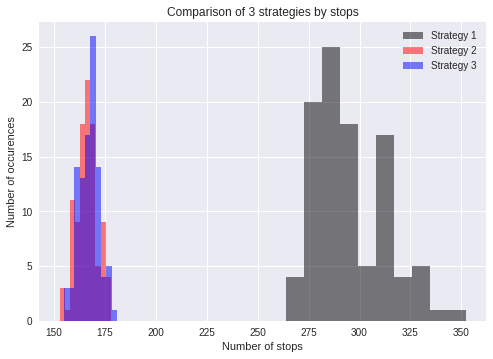

In [56]:
# Comparison of the three strategies
plt.hist(stops_1, fc=(0, 0, 0, 0.5))
plt.hist(tot_stops, color='r', fc=(1, 0, 0, 0.5))
plt.hist(stops_3, fc=(0, 0, 1, 0.5))
plt.title("Comparison of 3 strategies by stops")
plt.ylabel("Number of occurences")
plt.xlabel("Number of stops")
plt.legend(["Strategy 1", "Strategy 2", "Strategy 3"])
plt.show()

** Floor comparison **

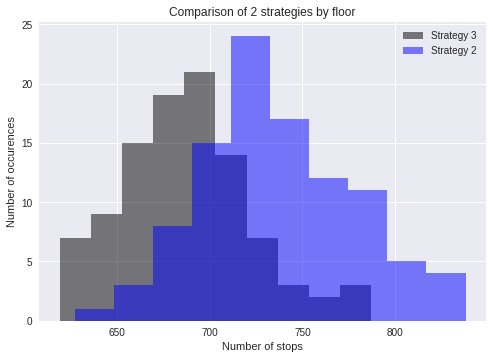

Average floors travelled for strategy 3: 687.42
Average floors travelled for strategy 2: 737.15


In [57]:
# Comparison of the three strategies
plt.hist(floors_traveled_3, fc=(0, 0, 0, 0.5))
plt.hist(floors2, fc=(0, 0, 1, 0.5))
plt.title("Comparison of 2 strategies by floor")
plt.ylabel("Number of occurences")
plt.xlabel("Number of stops")
plt.legend(["Strategy 3", "Strategy 2"])
plt.show()
print(f"Average floors travelled for strategy 3: {np.mean(floors_traveled_3)}")
print(f"Average floors travelled for strategy 2: {np.mean(floors2)}")

It is quite clear that while  strategy 2 and 3 all make similar number of stops, strategy 2 generally travells less stops and as such, is the best strategy of the three.

** Stats **

Average number of stops:

*Strategy 1:* c 297

*Strategy 2:* c 166

*Strategy 3:* c 168

** Stats **

Average number of floors travelled:

*Strategy 1:* Untracked

*Strategy 2:*  c 730

*Strategy 3:* c 680